In [1]:
# import torch
# torch.cuda.is_available()

: 

: 

In [1]:
import matplotlib.pyplot as plt
import glob
import tensorflow as tf
import numpy as np

In [2]:
X_label='Train_EnvstepsSoFar'
Y_label='Train_AverageReturn'
def get_section_results(file, X_label='Train_EnvstepsSoFar', Y_label='Train_AverageReturn'):
    """
        requires tensorflow==1.12.0
    """
    X = []
    Y = []
    for e in tf.compat.v1.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag == X_label:
                X.append(v.simple_value)
            elif v.tag == Y_label:
                Y.append(v.simple_value)
    return X, Y

def getXY(exp_name, X_label='Train_EnvstepsSoFar', Y_label='Train_AverageReturn'):
    logdir = '/home/harvey/Documents/cs285/homework_fall2022/hw3/data/%s/events*'%exp_name
    eventfile = glob.glob(logdir)[0]
    X, Y = get_section_results(eventfile, X_label=X_label, Y_label=Y_label)
    return X, Y

def check(exp_name):
    X, Y = getXY(exp_name)
    for i, (x, y) in enumerate(zip(X, Y)):
        print('Iteration {:d} | Train steps: {:d} | Return: {}'.format(i, int(x), y))

In [85]:
q1name = "q1_MsPacman-v0_10-10-2022_11-16-30"
q21name = "q2_doubledqn_1_LunarLander-v3_10-10-2022_19-32-44"
q22name = "q2_doubledqn_2_LunarLander-v3_10-10-2022_19-48-28"
q23name = "q2_doubledqn_3_LunarLander-v3_11-10-2022_01-53-35"
q24name = "q2_doubledqn_4_LunarLander-v3_11-10-2022_11-17-36"
q25name = "q2_doubledqn_5_LunarLander-v3_11-10-2022_11-17-36"
q26name = "q2_doubledqn_6_LunarLander-v3_11-10-2022_11-17-36"
q31name = "q3_hparam1_LunarLander-v3_16-10-2022_14-30-42" # lr = 0.005
q32name = "q3_hparam2_LunarLander-v3_16-10-2022_15-03-00" # lr = 0.002
q33name = "q3_hparam3_LunarLander-v3_16-10-2022_15-24-59" # lr = 0.0005
q41name = "q4_ac_1_1_CartPole-v0_16-10-2022_17-19-34"
q42name = "q4_100_1_CartPole-v0_16-10-2022_17-20-35"
q43name = "q4_1_100_CartPole-v0_16-10-2022_17-23-17"
q44name = "q4_10_10_CartPole-v0_16-10-2022_17-24-26"

q51name = "q5_10_10_InvertedPendulum-v4_16-10-2022_17-48-58"
q52name = "q5_10_10_HalfCheetah-v4_16-10-2022_17-56-01"

q61name = "q6a_sac_InvertedPendulum__DEFAULTtest_InvertedPendulum-v4_17-10-2022_23-19-20"
q62name = "q6b_sac_HalfCheetah_default_HalfCheetah-v4_17-10-2022_23-29-44"
q63name = "q6b_sac_HalfCheetah_actorfreq10_HalfCheetah-v4_17-10-2022_23-46-15"
q64name = "q6b_sac_HalfCheetah_actorfreq10_numcritupdperagentupd10_HalfCheetah-v4_18-10-2022_00-18-33"
q65name = "q6b_sac_HalfCheetah_actorfreq10_HalfCheetah-v4_18-10-2022_00-48-53"
q66name = "q6b_sac_HalfCheetah_actorfreq10_HalfCheetah-v4_18-10-2022_00-55-03"

dqn_lunar1 = "q2_dqn_1_LunarLander-v3_10-10-2022_22-39-46"
dqn_lunar2 = "q2_dqn_2_LunarLander-v3_10-10-2022_23-13-09"
dqn_lunar3 = "q2_dqn_3_LunarLander-v3_10-10-2022_23-45-06"

# check(q62name)

# HW3 Report

## Qustion 1: basic Q-learning performance (DQN)

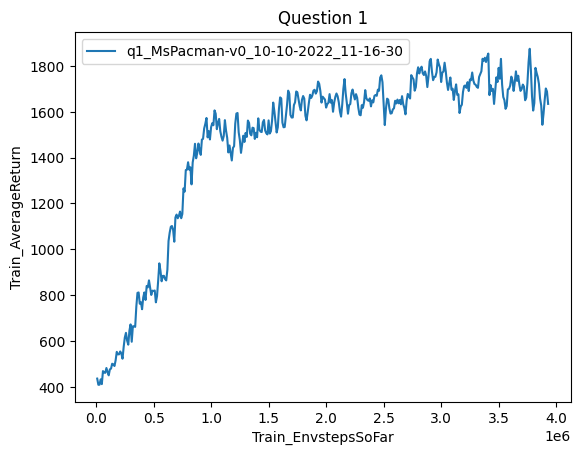

In [29]:
exp_names = [q1name]

for exp_name in exp_names:
    X1, Y1 = getXY(exp_name)
    plt.plot(X1[1:], Y1, label=exp_name)
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.legend()

plt.title("Question 1")
plt.show()

## Question 2: double Q-learning (DDQN)

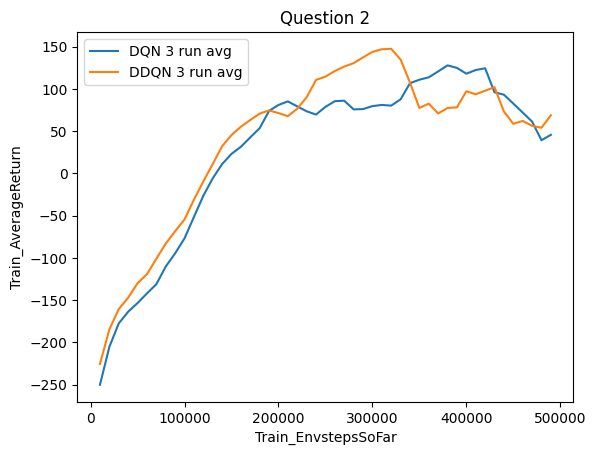

In [30]:
dqn_exp_names = [dqn_lunar1, dqn_lunar2, dqn_lunar3]
ddqn_exp_names = [q24name, q25name, q26name]

def avg_experiments(exp_names):
    Xs, Ys = [], []
    for exp_name in exp_names:
        X1, Y1 = getXY(exp_name)
        X1, Y1 = X1[1:], Y1
        Xs.append(np.array(X1))
        Ys.append(np.array(Y1))
    Xs = sum(Xs) / len(exp_names)
    Ys = sum(Ys) / len(exp_names)
    return Xs, Ys

dqn_X, dqn_Y = avg_experiments(dqn_exp_names)
ddqn_X, ddqn_Y = avg_experiments(ddqn_exp_names)
plt.plot(dqn_X, dqn_Y, label="DQN 3 run avg")
plt.plot(ddqn_X, ddqn_Y, label="DDQN 3 run avg")
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.legend()

plt.title("Question 2")
plt.show()

## Question 3

Text(0.5, 1.0, 'q3')

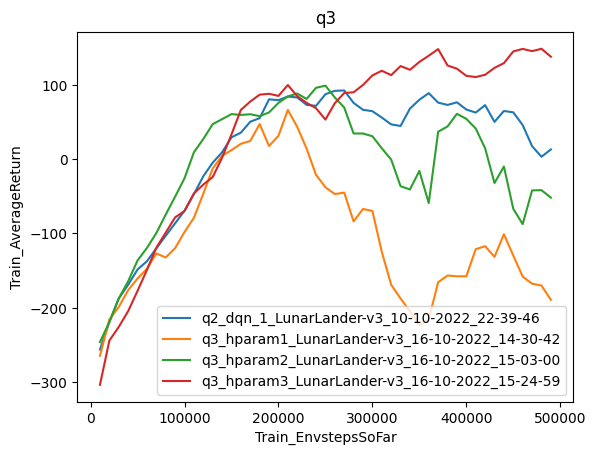

In [37]:
exp_names = [dqn_lunar1, q31name, q32name, q33name]

for exp_name in exp_names:
    X1, Y1 = getXY(exp_name)
    plt.plot(X1[1:], Y1, label=exp_name)
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.legend()

plt.title("q3")

## Question 4: Sanity check with Cartpole

Text(0.5, 1.0, 'Question 4')

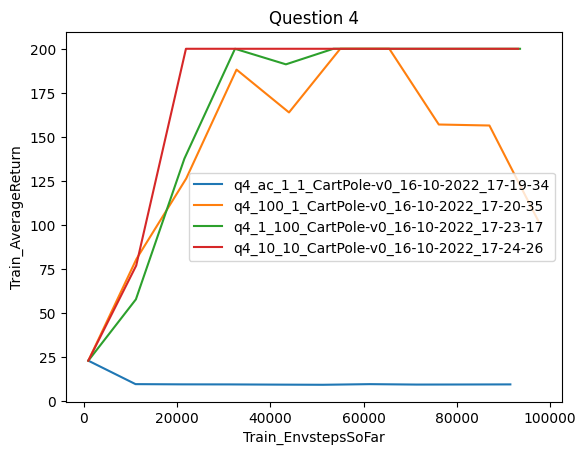

In [50]:
exp_names = [q41name, q42name, q43name, q44name]

for exp_name in exp_names:
    X1, Y1 = getXY(exp_name)
    plt.plot(X1, Y1, label=exp_name)
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.legend()

plt.title("Question 4")

## Question 5

Text(0.5, 1.0, 'Question 5 Half Cheetah')

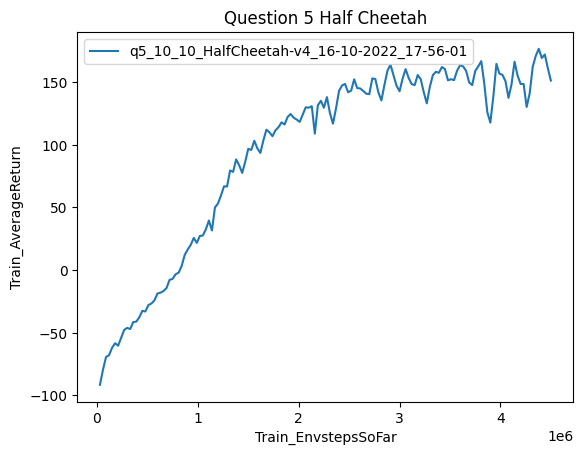

In [6]:
exp_names = [q52name]

for exp_name in exp_names:
    X1, Y1 = getXY(exp_name)
    plt.plot(X1, Y1, label=exp_name)
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.legend()

plt.title("Question 5 Half Cheetah")

Text(0.5, 1.0, 'Question 5 Inverted Pendulum')

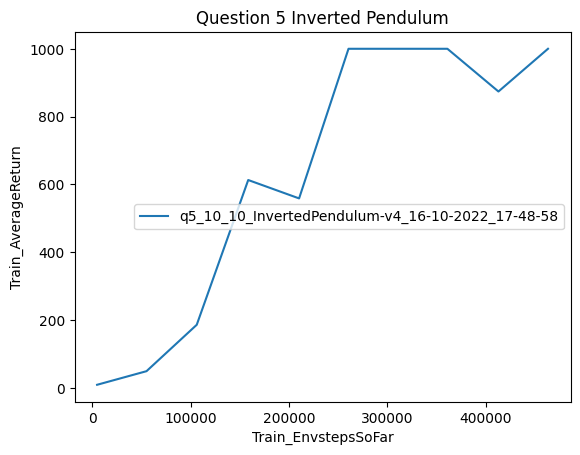

In [8]:
exp_names = [q51name]

for exp_name in exp_names:
    X1, Y1 = getXY(exp_name)
    plt.plot(X1, Y1, label=exp_name)
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.legend()

plt.title("Question 5 Inverted Pendulum")

## Question 6: Run soft actor-critic more difficult tasks.

Text(0.5, 1.0, 'Question 6')

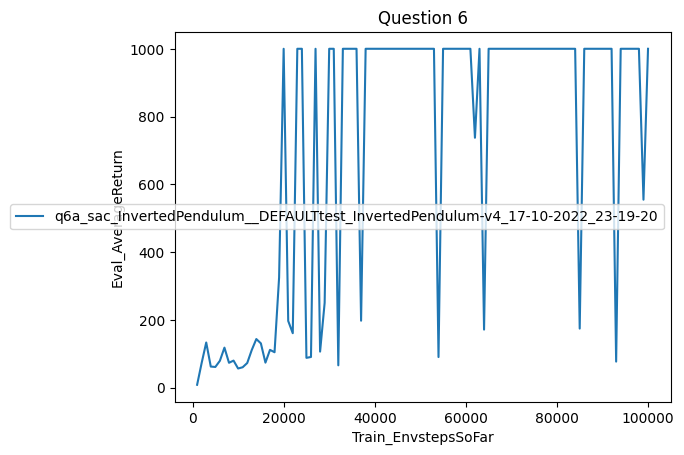

In [37]:
X_label='Train_EnvstepsSoFar'
Y_label='Eval_AverageReturn'
# Y_label='Train_AverageReturn'
exp_names = [q61name]

for exp_name in exp_names:
    X1, Y1 = getXY(exp_name, X_label=X_label, Y_label=Y_label)
    plt.plot(X1, Y1, label=exp_name)
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.legend()

plt.title("Question 6")

Text(0.5, 1.0, 'Question 6')

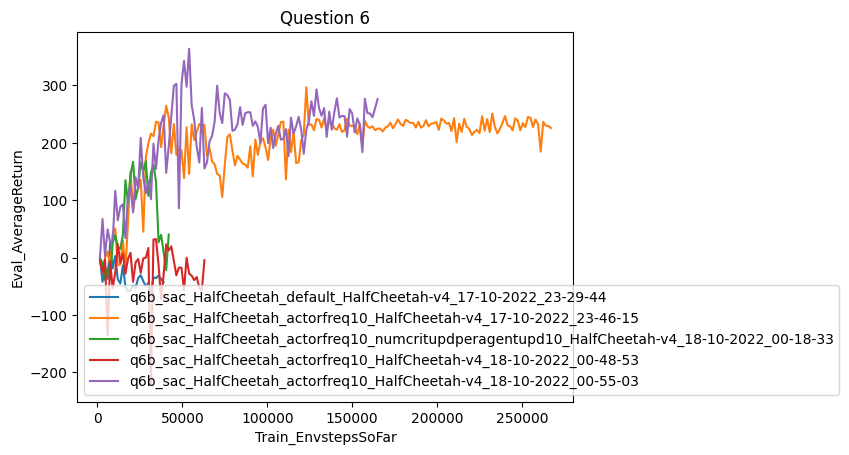

In [88]:
X_label='Train_EnvstepsSoFar'
Y_label='Eval_AverageReturn'
# Y_label='Train_AverageReturn'
exp_names = [q62name, q63name, q64name, q65name, q66name]

for exp_name in exp_names:
    X1, Y1 = getXY(exp_name, X_label=X_label, Y_label=Y_label)
    plt.plot(X1, Y1, label=exp_name)
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.legend()

plt.title("Question 6")

Text(0.5, 1.0, 'Question 6')

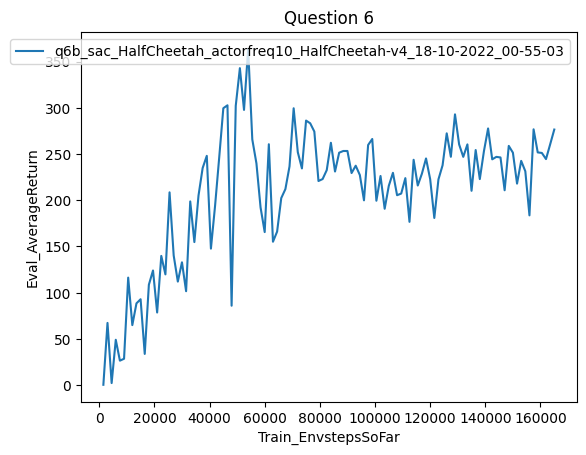

In [87]:
X_label='Train_EnvstepsSoFar'
Y_label='Eval_AverageReturn'
# Y_label='Train_AverageReturn'
exp_names = [q66name]

for exp_name in exp_names:
    X1, Y1 = getXY(exp_name, X_label=X_label, Y_label=Y_label)
    plt.plot(X1, Y1, label=exp_name)
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.legend()

plt.title("Question 6")